<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/VN_Banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import asanyarray, save
from numpy.core.multiarray import asarray
from keras.utils import load_img, img_to_array, to_categorical
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy
from os import listdir
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder = '/content/drive/MyDrive/AI/bank_VN/Banknotes_Train/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5k'):
    output = 1.0
  if file.startswith('10k'):
    output = 2.0
  if file.startswith('20k'):
    output = 3.0
  if file.startswith('50k'):
    output = 4.0 
  if file.startswith('100k'):
    output = 5.0
  if file.startswith('500k'):
    output = 6.0
  photo = load_img(folder+file, target_size = (60,30))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

save('/content/drive/MyDrive/AI/bank_VN/afterpreprocessing/VN_banknotes_photos.npy', photos)
save('/content/drive/MyDrive/AI/bank_VN/afterpreprocessing/VN_banknotes_labels.npy', labels)

photos = np.load('/content/drive/MyDrive/AI/bank_VN/afterpreprocessing/VN_banknotes_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/bank_VN/afterpreprocessing/VN_banknotes_labels.npy')

x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=7)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(60, 30, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(7, activation='softmax'))

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 15, epochs = 10, verbose = 1)

Epoch 1/10
13/13 [==============================] - 10s 20ms/step - loss: 1.7997 - accuracy: 0.2324
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 1.6222 - accuracy: 0.3784
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 1.3375 - accuracy: 0.5189
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.9535 - accuracy: 0.6595
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5612 - accuracy: 0.8162
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4684 - accuracy: 0.8595
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.8703
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8486
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9622
Epoch 10/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9784


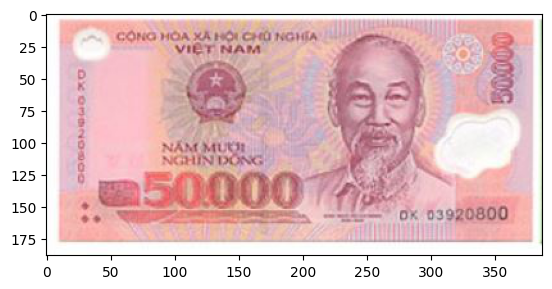

1/1 [==============================] - 1s 543ms/step
4
Đây là tờ:  50000đ


In [4]:

img = Image.open('/content/drive/MyDrive/AI/bank_VN/Banknotes_Test/50k1.JPG')

IMG = img
img = img.resize((60, 30))

img = np.asarray(img)
img = img.reshape(1,60,30,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết","5000đ", "10000đ","20000đ","50000đ","100000đ","500000đ"]
temp1 = matrix[0]
print(temp1)
print("Đây là tờ: ", class_names[temp1])